In [2]:
import bilby
import icarogw
import h5py
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [3]:
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Palatino Linotype', 'Palatino', 'TeX Gyre Pagella', 'Times New Roman']
rcParams['font.sans-serif'] = ['Helvetica', 'Arial']
rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.rm'] = 'Palatino'
rcParams['mathtext.it'] = 'Palatino:italic'
rcParams['mathtext.bf'] = 'Palatino:bold'

matplotlib.rc('xtick', labelsize = 16) 
matplotlib.rc('ytick', labelsize = 16)

In [4]:
my_color = '#2f4f4f'
my_color2 = '#f6b26b'

In [5]:
from analyses_dictionaries import O1_O3_CBCs_far_1 as listev_CBCs_O3
from analyses_dictionaries import O1_O3_BBHs_far_1 as listev_BBHs_O3

from analyses_dictionaries import O4a_CBCs_far_1 as listev_CBCs_O4a
from analyses_dictionaries import O4a_BBHs_far_1 as listev_BBHs_O4a

In [6]:
# Gregoire's code
amax = 0.99
spinp= (1./amax)*(1./amax)*0.5*0.5
prior_dl = bilby.gw.prior.UniformSourceFrame(name='luminosity_distance', minimum=0.1, maximum=40000, unit='Mpc')

def create_postdic_O3(listev):
    
    posterior_dict = {}
    for ev in list(listev.keys()):
        #print('Loading event ', ev)
        data = h5py.File(listev[ev]['PE'])
        pp =data[listev[ev]['PE_waveform']]['posterior_samples']
        pos_dict={'mass_1':pp['mass_1'][()],'mass_2':pp['mass_2'][()],
                 'luminosity_distance':pp['luminosity_distance'][()],
                 'right_ascension':pp['ra'][()],'declination':pp['dec'][()],
                  'chi_1':pp['a_1'][()], 'chi_2':pp['a_2'][()], 
                 'cos_t_1':pp['cos_tilt_1'][()],'cos_t_2':pp['cos_tilt_2'][()]
                 }

        pp_remove = np.power(pp['luminosity_distance'][()],2.)*spinp
        pp_remove*=(0.25/np.pi)
        posterior_dict[ev]=icarogw.posterior_samples.posterior_samples(pos_dict,prior=pp_remove)
        
    return posterior_dict

def create_postdic_O4a(listev):
    
    posterior_dict = {}
    for ev in list(listev.keys()):
        #print('Loading event ', ev)
        data = h5py.File(listev[ev]['PE'])
        pp =data[listev[ev]['PE_waveform']]['posterior_samples']
        pos_dict={'mass_1':pp['mass_1'][()],'mass_2':pp['mass_2'][()],
                 'luminosity_distance':pp['luminosity_distance'][()],
                 'right_ascension':pp['ra'][()],'declination':pp['dec'][()],
                  'chi_1':pp['a_1'][()], 'chi_2':pp['a_2'][()], 
                 'cos_t_1':pp['cos_tilt_1'][()],'cos_t_2':pp['cos_tilt_2'][()]
                 }

        pp_remove = prior_dl.prob(pp['luminosity_distance'][()])*spinp
        pp_remove*=(0.25/np.pi)
        posterior_dict[ev]=icarogw.posterior_samples.posterior_samples(pos_dict,prior=pp_remove)
        
    return posterior_dict

posterior_dict_CBCs_O3 = create_postdic_O3(listev_CBCs_O3)
posterior_dict_BBHs_O3 = create_postdic_O3(listev_BBHs_O3)
posterior_dict_CBCs_O4a = create_postdic_O4a(listev_CBCs_O4a)
posterior_dict_BBHs_O4a = create_postdic_O4a(listev_BBHs_O4a)

In [7]:
len(posterior_dict_CBCs_O3), len(posterior_dict_BBHs_O3)

(73, 69)

In [8]:
len(posterior_dict_CBCs_O4a), len(posterior_dict_BBHs_O4a)

(74, 73)

In [9]:
CL_percentile = [2.25, 97.5]

In [10]:
posteriors_o3 = posterior_dict_CBCs_O3

m1_posterior_o3_median = []
m2_posterior_o3_median = []
dL_posterior_o3_median = []


m1_posterior_o3_CL = []
m2_posterior_o3_CL = []
dL_posterior_o3_CL = []

for ev in posteriors_o3.keys():
        m1_posterior_o3_median.append(np.median(posteriors_o3[ev].posterior_data['mass_1']))
        m2_posterior_o3_median.append(np.median(posteriors_o3[ev].posterior_data['mass_2']))
        dL_posterior_o3_median.append(np.median(posteriors_o3[ev].posterior_data['luminosity_distance']))
    
        m1_posterior_o3_CL.append(np.percentile(posteriors_o3[ev].posterior_data['mass_1'], CL_percentile))
        m2_posterior_o3_CL.append(np.percentile(posteriors_o3[ev].posterior_data['mass_2'], CL_percentile))
        dL_posterior_o3_CL.append(np.percentile(posteriors_o3[ev].posterior_data['luminosity_distance'], CL_percentile))

m1_posterior_o3_median = np.array(m1_posterior_o3_median)
m1_posterior_o3_CL_df = pd.DataFrame(m1_posterior_o3_CL)

m2_posterior_o3_median = np.array(m2_posterior_o3_median)
m2_posterior_o3_CL_df = pd.DataFrame(m2_posterior_o3_CL)

dL_posterior_o3_median = np.array(dL_posterior_o3_median)
dL_posterior_o3_CL_df = pd.DataFrame(dL_posterior_o3_CL)

m1_err_lower_o3 = m1_posterior_o3_median - m1_posterior_o3_CL_df[0].to_numpy()
m1_err_upper_o3 = m1_posterior_o3_CL_df[1].to_numpy() - m1_posterior_o3_median
m1_err_o3 = [m1_err_lower_o3, m1_err_upper_o3]

m2_err_lower_o3 = m2_posterior_o3_median - m2_posterior_o3_CL_df[0].to_numpy()
m2_err_upper_o3 = m2_posterior_o3_CL_df[1].to_numpy() - m2_posterior_o3_median
m2_err_o3 = [m2_err_lower_o3, m2_err_upper_o3]

dL_err_lower_o3 = dL_posterior_o3_median - dL_posterior_o3_CL_df[0].to_numpy()
dL_err_upper_o3 = dL_posterior_o3_CL_df[1].to_numpy() - dL_posterior_o3_median
dL_err_o3 = [dL_err_lower_o3, dL_err_upper_o3]

Mtot_posterior_o3_median = m1_posterior_o3_median + m2_posterior_o3_median
Mtot_err_lower_o3 = m1_err_lower_o3 + m2_err_lower_o3
Mtot_err_upper_o3 = m1_err_upper_o3 + m2_err_upper_o3
Mtot_err_o3 = [Mtot_err_lower_o3, Mtot_err_upper_o3]

In [11]:
posteriors_o4 = posterior_dict_CBCs_O4a

m1_posterior_o4_median = []
m2_posterior_o4_median = []
dL_posterior_o4_median = []


m1_posterior_o4_CL = []
m2_posterior_o4_CL = []
dL_posterior_o4_CL = []

for ev in posteriors_o4.keys():
        m1_posterior_o4_median.append(np.median(posteriors_o4[ev].posterior_data['mass_1']))
        m2_posterior_o4_median.append(np.median(posteriors_o4[ev].posterior_data['mass_2']))
        dL_posterior_o4_median.append(np.median(posteriors_o4[ev].posterior_data['luminosity_distance']))
    
        m1_posterior_o4_CL.append(np.percentile(posteriors_o4[ev].posterior_data['mass_1'], CL_percentile))
        m2_posterior_o4_CL.append(np.percentile(posteriors_o4[ev].posterior_data['mass_2'], CL_percentile))
        dL_posterior_o4_CL.append(np.percentile(posteriors_o4[ev].posterior_data['luminosity_distance'], CL_percentile))

m1_posterior_o4_median = np.array(m1_posterior_o4_median)
m1_posterior_o4_CL_df = pd.DataFrame(m1_posterior_o4_CL)

m2_posterior_o4_median = np.array(m2_posterior_o4_median)
m2_posterior_o4_CL_df = pd.DataFrame(m2_posterior_o4_CL)

dL_posterior_o4_median = np.array(dL_posterior_o4_median)
dL_posterior_o4_CL_df = pd.DataFrame(dL_posterior_o4_CL)

m1_err_lower_o4 = m1_posterior_o4_median - m1_posterior_o4_CL_df[0].to_numpy()
m1_err_upper_o4 = m1_posterior_o4_CL_df[1].to_numpy() - m1_posterior_o4_median
m1_err_o4 = [m1_err_lower_o4, m1_err_upper_o4]

m2_err_lower_o4 = m2_posterior_o4_median - m2_posterior_o4_CL_df[0].to_numpy()
m2_err_upper_o4 = m2_posterior_o4_CL_df[1].to_numpy() - m2_posterior_o4_median
m2_err_o4 = [m2_err_lower_o4, m2_err_upper_o4]

dL_err_lower_o4 = dL_posterior_o4_median - dL_posterior_o4_CL_df[0].to_numpy()
dL_err_upper_o4 = dL_posterior_o4_CL_df[1].to_numpy() - dL_posterior_o4_median
dL_err_o4 = [dL_err_lower_o4, dL_err_upper_o4]

Mtot_posterior_o4_median = m1_posterior_o4_median + m2_posterior_o4_median
Mtot_err_lower_o4 = m1_err_lower_o4 + m2_err_lower_o4
Mtot_err_upper_o4 = m1_err_upper_o4 + m2_err_upper_o4
Mtot_err_o4 = [Mtot_err_lower_o4, Mtot_err_upper_o4]

findfont: Generic family 'serif' not found because none of the following families were found: Palatino Linotype, Palatino, TeX Gyre Pagella, Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Palatino Linotype, Palatino, TeX Gyre Pagella, Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Palatino Linotype, Palatino, TeX Gyre Pagella, Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Palatino Linotype, Palatino, TeX Gyre Pagella, Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Palatino Linotype, Palatino, TeX Gyre Pagella, Times New Roman
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Palatino Linotype, Palatino, TeX Gyre Pagella, Ti

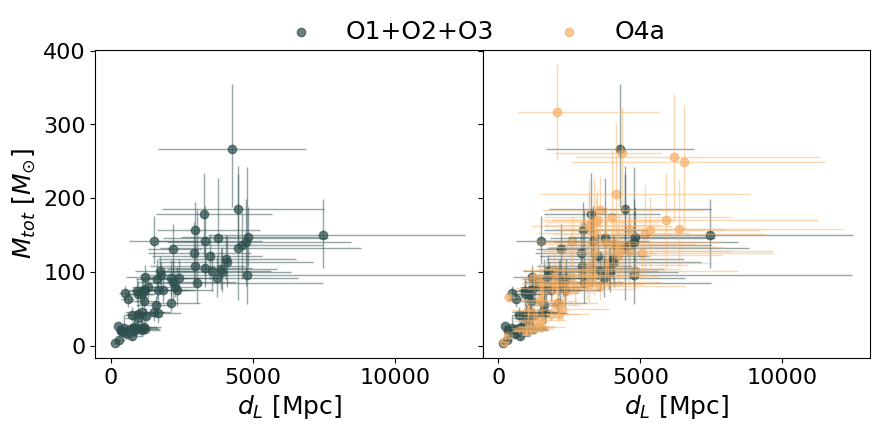

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
# O3 data
bp1 = axs[0].scatter(dL_posterior_o3_median, Mtot_posterior_o3_median, color=my_color, alpha=0.7,
                    label='O1+O2+O3')
axs[0].errorbar(dL_posterior_o3_median, Mtot_posterior_o3_median, xerr=dL_err_o3, yerr=Mtot_err_o3, 
           ecolor=my_color, alpha=0.5, elinewidth=1, linestyle='none') 

# O3 + O4a data
axs[1].scatter(dL_posterior_o3_median, Mtot_posterior_o3_median, color=my_color,alpha=0.7)
axs[1].errorbar(dL_posterior_o3_median, Mtot_posterior_o3_median, xerr=dL_err_o3, yerr=Mtot_err_o3, 
           ecolor=my_color, alpha=0.5, elinewidth=1, linestyle='none')
bp2 = axs[1].scatter(dL_posterior_o4_median, Mtot_posterior_o4_median, color=my_color2, alpha=0.7,
                    label='O4a')
axs[1].errorbar(dL_posterior_o4_median, Mtot_posterior_o4_median, xerr=dL_err_o4, yerr=Mtot_err_o4, 
           ecolor=my_color2, alpha=0.5, elinewidth=1, linestyle='none')

axs[0].set_xlabel('$d_L$ [Mpc]', fontsize=18)
axs[1].set_xlabel('$d_L$ [Mpc]', fontsize=18)
axs[0].set_ylabel('$M_{tot}$ $[M_{\odot}]$', fontsize=18)

fig.legend(fontsize=18, bbox_to_anchor=(0.5, 0.925), loc='center', 
                 ncol = 2, frameon=False)
plt.subplots_adjust(wspace=0., hspace=0.)
plt.savefig('plots/gwtc4_data_mass_distance.pdf', bbox_inches='tight')
plt.show()

findfont: Generic family 'serif' not found because none of the following families were found: Palatino Linotype, Palatino, TeX Gyre Pagella, Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Palatino Linotype, Palatino, TeX Gyre Pagella, Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Palatino Linotype, Palatino, TeX Gyre Pagella, Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Palatino Linotype, Palatino, TeX Gyre Pagella, Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Palatino Linotype, Palatino, TeX Gyre Pagella, Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Palatino Linotype, Palatino, TeX Gyre Pagella, Times New Roman
findfont: Generic family 'serif' not found because none of

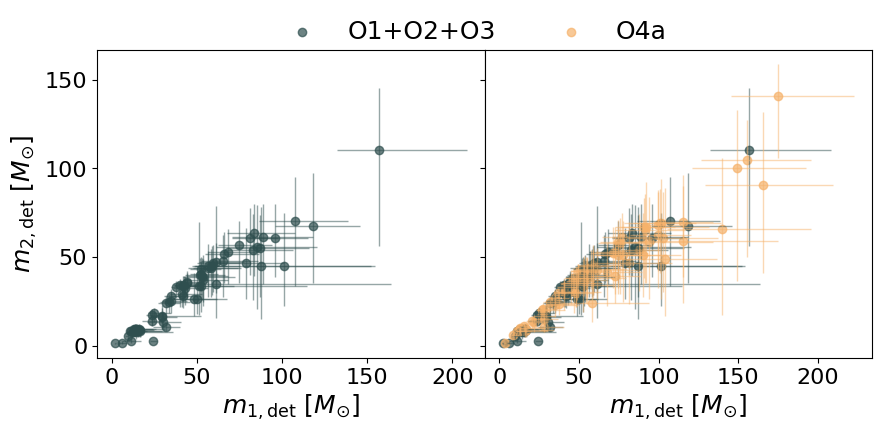

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
# O3 data
bp1 = axs[0].scatter(m1_posterior_o3_median, m2_posterior_o3_median, color=my_color, alpha=0.7,
                    label='O1+O2+O3')
axs[0].errorbar(m1_posterior_o3_median, m2_posterior_o3_median, xerr=m1_err_o3, yerr=m2_err_o3, 
           ecolor=my_color, alpha=0.5, elinewidth=1, linestyle='none') 

# O3 + O4a data
axs[1].scatter(m1_posterior_o3_median, m2_posterior_o3_median, color=my_color,alpha=0.7)
axs[1].errorbar(m1_posterior_o3_median, m2_posterior_o3_median, xerr=m1_err_o3, yerr=m2_err_o3,
           ecolor=my_color, alpha=0.5, elinewidth=1, linestyle='none')
bp2 = axs[1].scatter(m1_posterior_o4_median, m2_posterior_o4_median, color=my_color2, alpha=0.7,
                    label='O4a')
axs[1].errorbar(m1_posterior_o4_median, m2_posterior_o4_median, xerr=m1_err_o4, yerr=m2_err_o4,
           ecolor=my_color2, alpha=0.5, elinewidth=1, linestyle='none')

axs[0].set_xlabel('$m_{1, \\rm det}$ $[M_{\odot}]$', fontsize=18)
axs[1].set_xlabel('$m_{1, \\rm det}$ $[M_{\odot}]$', fontsize=18)
axs[0].set_ylabel('$m_{2, \\rm det}$ $[M_{\odot}]$', fontsize=18)

fig.legend(fontsize=18, bbox_to_anchor=(0.5, 0.925), loc='center', 
                 ncol = 2, frameon=False)
plt.subplots_adjust(wspace=0., hspace=0.)
plt.savefig('plots/gwtc4_data_masses.pdf', bbox_inches='tight')
plt.show()